In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler

# se normaliza el data set con MinMaxScaler
# se visualizan y se guardan resultados obtenidos


In [58]:
DataSet = pd.read_csv('../../data/processed/Dataset_Particulas_contaminantes.csv',sep=';', thousands=None, decimal=',')
DataSet['fecha'] = pd.to_datetime(DataSet['fecha'])

In [59]:
data_MinMaxScaler = DataSet.copy()

# columnas numericas
cols = data_MinMaxScaler.select_dtypes(include=[float, int]).columns.tolist()

# Crea el escalador
scaler_minmax = MinMaxScaler()

# Ajusta el escalador solo en las columnas numéricas y transforma
data_MinMaxScaler[cols] = scaler_minmax.fit_transform(data_MinMaxScaler[cols])

path = '../../data/processed/normalizados/Dataset_MinMax.csv'

data_MinMaxScaler.to_csv(path, sep=';',index=False, float_format='%.4f', decimal=',')

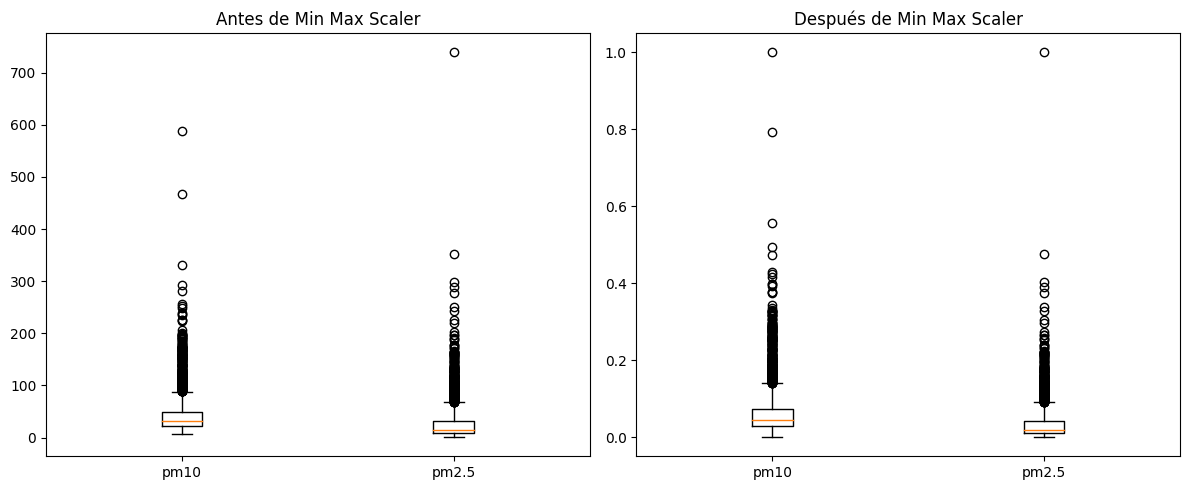

In [60]:
# Creando boxplots para visualizar los valores atípicos
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.boxplot([DataSet['pm10'], DataSet['pm2.5']])
plt.title('Antes de Min Max Scaler')
plt.xticks([1, 2], ['pm10', 'pm2.5'])

plt.subplot(1, 2, 2)
plt.boxplot([data_MinMaxScaler['pm10'], data_MinMaxScaler['pm2.5']])
plt.title('Después de Min Max Scaler')
plt.xticks([1, 2], ['pm10', 'pm2.5'])

plt.tight_layout()

# Guardar la imagen
ruta_guardado = './imagenes/normalizacion_MinMax.png'  # Reemplaza con tu ruta
plt.savefig(ruta_guardado, format='png', dpi=300)

plt.show()


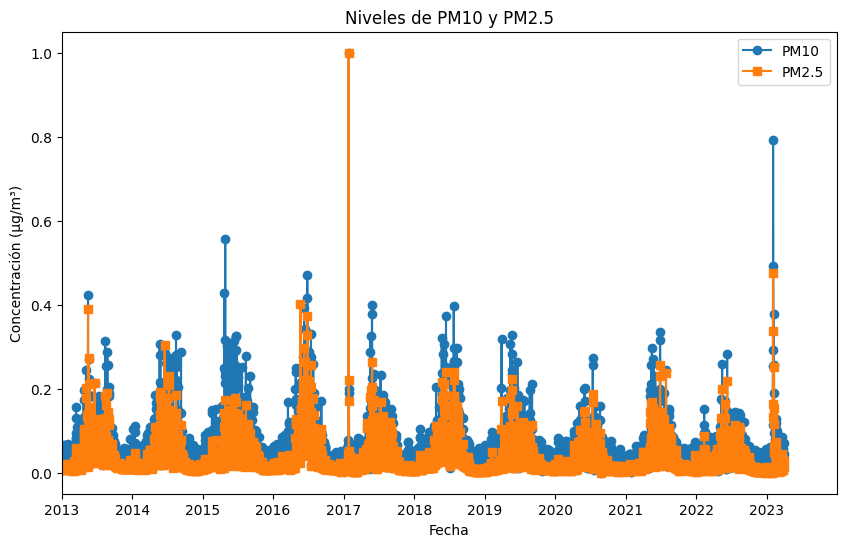

In [61]:
fecha = data_MinMaxScaler['fecha']
pm10 = data_MinMaxScaler['pm10']
pm25= data_MinMaxScaler['pm2.5']

# Graficar los datos
plt.figure(figsize=(10,6))
plt.plot(fecha, pm10, label='PM10', marker='o')
plt.plot(fecha, pm25, label='PM2.5', marker='s')

plt.title('Niveles de PM10 y PM2.5')
plt.xlabel('Fecha')
plt.ylabel('Concentración (µg/m³)')
plt.legend()

# Configurar el formato y la ubicación de las marcas del eje x
ax = plt.gca()  # Obtener el eje actual
ax.xaxis.set_major_locator(mdates.YearLocator())  # Ubicar una marca por año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formatear las marcas como 'YYYY'

# Establecer los límites del eje x
plt.xlim([pd.Timestamp('2013-01-01'), pd.Timestamp('2023-12-31')])

# Guardar la imagen
ruta_guardado = './imagenes/niveles_contaminantes_anuales_MinMax_normalizados.png'  # Reemplaza con tu ruta
plt.savefig(ruta_guardado, format='png', dpi=300)


plt.show()

